# Data Preprocessing

In [1]:
#import dependencies
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

#set up connection to databse
from sqlalchemy import create_engine


protocol = 'postgresql'
username = 'postgres'
password = 'administrator'
host = 'wine.corp16oy9wyq.us-east-1.rds.amazonaws.com'
port = 5432
database = 'wine'

rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database}'
        
engine = create_engine(rds_connection_string)
conn = engine.connect()

In [2]:
#Retrieve Data from RDS SQL Database
data = pd.read_sql("SELECT * FROM wine_data", conn)
data.head()

,wine_id,country,description,designation,points,price,province,region_1,region_2,taster_name,...,max_temp,precip,humidity,heat_index,latitude_y,longitude_y,elevation,review_neg,review_neu,review_pos
0,1,US,"Overripe and Porty, with raisin, prune and cho...",Reserve,81,37.0,California,Paso Robles,Central Coast,None,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.829,0.171
1,2,US,"Strong aromas of blueberry paste, cracked pepp...",Paso Bordo Reserve,92,69.0,California,Paso Robles,Central Coast,Matt Kettmann,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.805,0.195
2,3,US,A vegetal note drags down the enjoyment. On th...,Reserve,84,39.0,California,Paso Robles,Central Coast,None,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.129,0.710,0.162
3,4,US,Larry Stanton patiently waits to release the w...,La Terraza Bloc Reserve,93,59.0,California,Paso Robles,Central Coast,Matt Kettmann,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.039,0.865,0.096
4,5,US,"High alcohol gives the wine heat, especially i...",La Tertazza Bloc Reserve,85,39.0,California,Paso Robles,Central Coast,None,...,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.895,0.105


In [3]:
print(data.nunique())


wine_id                  48847
country                      1
description              45206
designation              12744
points                      21
price                      158
province                     4
region_1                   201
region_2                    17
taster_name                 13
taster_twitter_handle       12
title                    45026
variety                    252
winery_name               4803
latitude_x                3032
longitude_x               3000
min_temp                   360
max_temp                   261
precip                    1564
humidity                  1306
heat_index                 242
latitude_y                2973
longitude_y               3185
elevation                  936
review_neg                 254
review_neu                 476
review_pos                 465
dtype: int64


In [4]:
data.drop(["wine_id", "country", "description", "designation","taster_name", "taster_twitter_handle", "title" ], axis=1, inplace=True)
data.head()

,points,price,province,region_1,region_2,variety,winery_name,latitude_x,longitude_x,min_temp,max_temp,precip,humidity,heat_index,latitude_y,longitude_y,elevation,review_neg,review_neu,review_pos
0,81,37.0,California,Paso Robles,Central Coast,Merlot,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.829,0.171
1,92,69.0,California,Paso Robles,Central Coast,Cabernet Sauvignon,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.805,0.195
2,84,39.0,California,Paso Robles,Central Coast,Pinot Noir,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.129,0.710,0.162
3,93,59.0,California,Paso Robles,Central Coast,Syrah,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.039,0.865,0.096
4,85,39.0,California,Paso Robles,Central Coast,Syrah,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.895,0.105


In [5]:
#create bins for price ranges
def price_to_range(price): 
  if (price < 20): 
    return 0 
  elif (price >20) and (price <= 45):
    return 1
  elif (price >45) and (price <= 80):
    return 2 
  if (price >80) and (price <= 100):
    return 3
  if (price >140) and (price <= 300): 
    return 4
  else: 
    return 5
  
data["price"] = data["price"].apply(price_to_range)
data = data.rename(columns={"price": "price_range"})
data.head()

,points,price_range,province,region_1,region_2,variety,winery_name,latitude_x,longitude_x,min_temp,max_temp,precip,humidity,heat_index,latitude_y,longitude_y,elevation,review_neg,review_neu,review_pos
0,81,1,California,Paso Robles,Central Coast,Merlot,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.829,0.171
1,92,2,California,Paso Robles,Central Coast,Cabernet Sauvignon,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.805,0.195
2,84,1,California,Paso Robles,Central Coast,Pinot Noir,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.129,0.710,0.162
3,93,2,California,Paso Robles,Central Coast,Syrah,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.039,0.865,0.096
4,85,1,California,Paso Robles,Central Coast,Syrah,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.895,0.105


In [6]:
def points_to_range(points): 
  if (points >= 90):
    return 0
  else: 
    return 1
  
data["points"] = data["points"].apply(points_to_range)
data = data.rename(columns={"points": "point_range"})
data.head()

,point_range,price_range,province,region_1,region_2,variety,winery_name,latitude_x,longitude_x,min_temp,max_temp,precip,humidity,heat_index,latitude_y,longitude_y,elevation,review_neg,review_neu,review_pos
0,1,1,California,Paso Robles,Central Coast,Merlot,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.829,0.171
1,0,2,California,Paso Robles,Central Coast,Cabernet Sauvignon,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.805,0.195
2,1,1,California,Paso Robles,Central Coast,Pinot Noir,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.129,0.710,0.162
3,0,2,California,Paso Robles,Central Coast,Syrah,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.039,0.865,0.096
4,1,1,California,Paso Robles,Central Coast,Syrah,Cerro Prieto winery,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,-117.203325,190.0,0.000,0.895,0.105


In [7]:
data["point_range"].value_counts()

1    28236
0    20611
Name: point_range, dtype: int64

In [8]:
variety_values = data["variety"].value_counts()
variety_value_counts = variety_values[variety_values > 100]
variety_value_counts

Pinot Noir                  8868
Cabernet Sauvignon          6811
Chardonnay                  6241
Syrah                       2978
Red Blend                   2548
Zinfandel                   2515
Merlot                      2137
Sauvignon Blanc             1891
Bordeaux-style Red Blend    1664
Riesling                    1550
Cabernet Franc               830
Pinot Gris                   764
RosÃ©                        701
RhÃ´ne-style Red Blend       649
Petite Sirah                 643
Viognier                     640
Sparkling Blend              608
White Blend                  523
Malbec                       491
Grenache                     489
Sangiovese                   365
Pinot Grigio                 321
Tempranillo                  299
GewÃ¼rztraminer              279
Meritage                     215
Barbera                      203
RhÃ´ne-style White Blend     198
MourvÃ¨dre                   181
Pinot Blanc                  178
Petit Verdot                 171
G-S-M     

In [9]:
# Choose a cutoff value and create a list of varieties to be replaced
cutoff = 1500
variety_types_to_replace = list(variety_values[variety_values <= cutoff].index)

# Replace in dataframe
for variety in variety_types_to_replace:
   data['variety'] = data['variety'].replace(variety,"Other")

# Check to make sure binning was successful
data['variety'].value_counts()

Other                       11644
Pinot Noir                   8868
Cabernet Sauvignon           6811
Chardonnay                   6241
Syrah                        2978
Red Blend                    2548
Zinfandel                    2515
Merlot                       2137
Sauvignon Blanc              1891
Bordeaux-style Red Blend     1664
Riesling                     1550
Name: variety, dtype: int64

In [10]:
winery_values = data["winery_name"].value_counts()
winery_value_counts = winery_values[winery_values > 100]
winery_value_counts

Testarossa winery               217
Williams Selyem winery          198
Chateau Ste. Michelle winery    193
Columbia Crest winery           158
Siduri winery                   126
Gary Farrell winery             125
Kendall-Jackson winery          118
Lynmar winery                   118
Robert Mondavi winery           112
Fess Parker winery              108
Iron Horse winery               106
Foxen winery                    103
Maryhill winery                 102
Chehalem winery                 102
Kunde winery                    101
Name: winery_name, dtype: int64

In [11]:
data.drop(['winery_name'], axis=1, inplace=True)
data.columns

Index(['point_range', 'price_range', 'province', 'region_1', 'region_2',
       'variety', 'latitude_x', 'longitude_x', 'min_temp', 'max_temp',
       'precip', 'humidity', 'heat_index', 'latitude_y', 'longitude_y',
       'elevation', 'review_neg', 'review_neu', 'review_pos'],
      dtype='object')

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
X_dummies = pd.get_dummies(data)
X_dummies

,point_range,price_range,latitude_x,longitude_x,min_temp,max_temp,precip,humidity,heat_index,latitude_y,...,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Merlot,variety_Other,variety_Pinot Noir,variety_Red Blend,variety_Riesling,variety_Sauvignon Blanc,variety_Syrah,variety_Zinfandel
0,1,1,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,...,0,0,1,0,0,0,0,0,0,0
1,0,2,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,...,1,0,0,0,0,0,0,0,0,0
2,1,1,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,...,0,0,0,0,1,0,0,0,0,0
3,0,2,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,...,0,0,0,0,0,0,0,0,1,0
4,1,1,33.343447,-117.203325,34.4,100.4,7.94,65.69,101.7,33.343447,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48842,1,1,47.766300,-122.148337,15.4,102.5,27.15,74.02,105.2,0.077000,...,0,0,0,1,0,0,0,0,0,0
48843,1,5,46.068561,-118.342366,-0.9,115.0,16.61,57.52,106.4,0.000000,...,0,0,0,0,0,0,0,1,0,0
48844,1,1,46.557883,-120.660862,2.0,112.9,6.90,57.53,107.1,0.059000,...,0,0,0,1,0,0,0,0,0,0
48845,1,5,46.003999,-118.371124,-0.8,114.5,17.07,57.74,106.0,0.000000,...,0,0,0,0,0,1,0,0,0,0


In [15]:
# Split our preprocessed data into our features and target arrays
X = X_dummies.drop('point_range',axis=1).values
y = data['point_range'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [16]:
X_train.shape

(36635, 247)

In [17]:
X_test.shape

(12212, 247)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()


# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
len(X_train[0])

247

# Machine Learning

# Saving Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit the model
classifier = LogisticRegression().fit(X_train_scaled,y_train)

# Evaluate the model
y_pred = classifier.predict(X_test_scaled)
score = accuracy_score(y_test,y_pred)
score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6843268915820504

In [22]:
print(f'Training Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Score: {classifier.score(X_test_scaled, y_test)}')

Training Score: 0.686665756789955
Testing Score: 0.6843268915820504


In [23]:
from sklearn.ensemble import RandomForestClassifier

# create and fit the model
clf = RandomForestClassifier(random_state=42, n_estimators=100).fit(X_train_scaled, y_train)

# Evaluate the model
y_predict = clf.predict(X_test_scaled)
score = accuracy_score(y_test,y_predict)
score

0.764739600393056

In [21]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9948955916473318
Testing Score: 0.7578611202096299


In [24]:
feature_importances = clf.feature_importances_

In [31]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)



SelectFromModel(estimator=RandomForestClassifier(random_state=42))

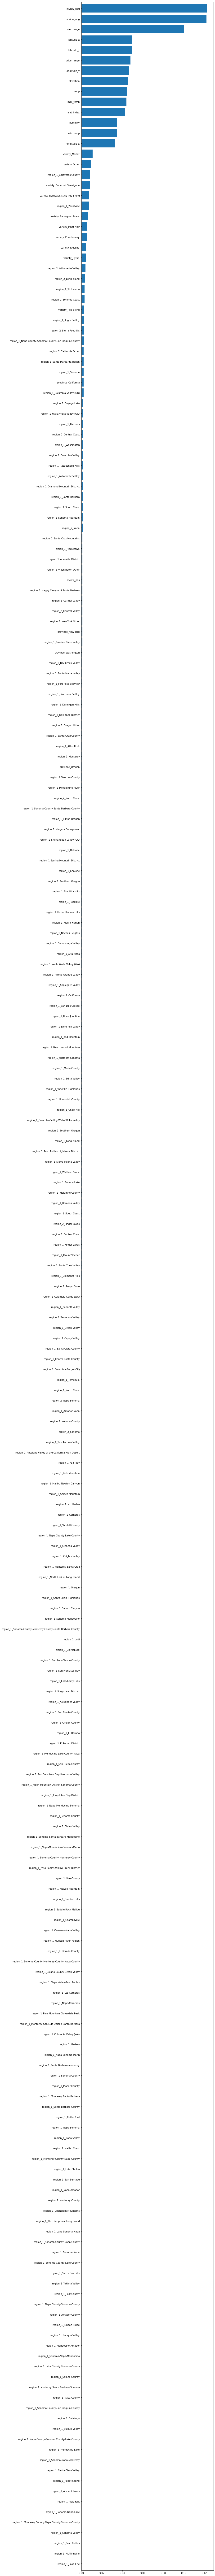

In [37]:
from matplotlib import pyplot as plt
import numpy as np
features = sorted(zip(X_dummies.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [39]:
features[::-1]

[('review_neu', 0.12292464397152231),
 ('review_neg', 0.12229892934526264),
 ('point_range', 0.10052640359976679),
 ('latitude_x', 0.04989977994804983),
 ('latitude_y', 0.0492325162733966),
 ('price_range', 0.047994475625881355),
 ('longitude_y', 0.046452812528808736),
 ('elevation', 0.04598924757192867),
 ('precip', 0.04476441771939503),
 ('max_temp', 0.044130885263084195),
 ('heat_index', 0.04287940580644307),
 ('humidity', 0.03452988180764415),
 ('min_temp', 0.034486211643525215),
 ('longitude_x', 0.03320371342072871),
 ('variety_Merlot', 0.010940471752379593),
 ('variety_Other', 0.009161973636789398),
 ('region_1_Calaveras County', 0.008658591937613086),
 ('variety_Cabernet Sauvignon', 0.00819886170294562),
 ('variety_Bordeaux-style Red Blend', 0.007729036670078733),
 ('region_1_Yountville', 0.00719866534854069),
 ('variety_Sauvignon Blanc', 0.006444756302173171),
 ('variety_Pinot Noir', 0.005191174043089668),
 ('variety_Chardonnay', 0.0051274488410373185),
 ('variety_Riesling', 0.

In [40]:
columns_to_pick = [_[0] for _ in features[::-1][:10]]
X_dummies[columns_to_pick].head()

,review_neu,review_neg,point_range,latitude_x,latitude_y,price_range,longitude_y,elevation,precip,max_temp
0,0.829,0.000,1,33.343447,33.343447,1,-117.203325,190.0,7.94,100.4
1,0.805,0.000,0,33.343447,33.343447,2,-117.203325,190.0,7.94,100.4
2,0.710,0.129,1,33.343447,33.343447,1,-117.203325,190.0,7.94,100.4
3,0.865,0.039,0,33.343447,33.343447,2,-117.203325,190.0,7.94,100.4
4,0.895,0.000,1,33.343447,33.343447,1,-117.203325,190.0,7.94,100.4


In [41]:
input_features = 10
hidden_layer1 = 50
# hidden_layer2= 100
# nodes3 =
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer1, activation="relu", input_dim=input_features))
# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_layer2, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                550       
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [42]:
# # Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
scaler = StandardScaler()

# Fit the StandardScaler
X = X_dummies[columns_to_pick]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_scaler=scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# # Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1145/1145 [==============================] - 3s 2ms/step - loss: 3.0700e-05 - accuracy: 1.0000
Epoch 2/5
1145/1145 [==============================] - 3s 2ms/step - loss: 1.5435e-05 - accuracy: 1.0000
Epoch 3/5
1145/1145 [==============================] - 3s 3ms/step - loss: 7.9412e-06 - accuracy: 1.0000
Epoch 4/5
1145/1145 [==============================] - 2s 2ms/step - loss: 4.1482e-06 - accuracy: 1.0000
Epoch 5/5
1145/1145 [==============================] - 2s 2ms/step - loss: 2.1862e-06 - accuracy: 1.0000


In [46]:
# # Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

382/382 - 2s - loss: 1.5929e-06 - accuracy: 1.0000 - 2s/epoch - 5ms/step
Loss: 1.5928751508909045e-06, Accuracy: 1.0
